In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文

plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
import seaborn as sns

In [392]:
import pandas as pd
vegetable_label = pd.read_excel('./附件1.xlsx')
sells = pd.read_excel('./附件2.xlsx')
import_info = pd.read_excel('./附件3.xlsx')
loss = pd.read_excel('./附件4.xlsx')
loss_product = pd.read_excel('./附件4.xlsx',sheet_name='Sheet1')

In [3]:
sells = sells.rename(columns={'销售日期':'日期'})
sells

,日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否


In [4]:
in_and_out = sells.merge(vegetable_label,on='单品编码').merge(import_info,on=['日期','单品编码'])
in_and_out.head()

,日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品名称,分类编码,分类名称,批发价格(元/千克)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,4.32
1,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,4.32
2,2020-07-01,09:21:55.556,102900005117056,0.277,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,4.32
3,2020-07-01,09:22:01.274,102900005117056,0.132,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,4.32
4,2020-07-01,09:41:09.342,102900005117056,0.198,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,4.32


In [5]:
loss.columns = ['分类编码','分类名称','损耗率']
loss

,分类编码,分类名称,损耗率
0,1011010201,花菜类,15.51
1,1011010402,水生根茎类,13.65
2,1011010101,花叶类,12.83
3,1011010801,食用菌,9.45
4,1011010504,辣椒类,9.24
5,1011010501,茄类,6.68


In [149]:
all_info = in_and_out.merge(loss_product,on=['单品名称','单品编码'])
all_info.head()
all_info['成本加成系数'] = all_info['销售单价(元/千克)']/all_info['批发价格(元/千克)']-1
all_info.sample(10)

,日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品名称,分类编码,分类名称,批发价格(元/千克),损耗率(%),成本加成系数
28951,2020-11-13,10:34:58.076,102900005115960,1.232,1.4,销售,否,大白菜,1011010101,花叶类,0.66,22.27,1.121212
311242,2021-08-20,16:05:55.000,102900051004294,0.050,8.0,销售,否,青线椒,1011010504,辣椒类,3.92,7.80,1.040816
717242,2022-07-02,09:56:21.947,102900011023464,0.252,6.0,销售,否,小青菜(1),1011010101,花叶类,3.52,10.33,0.704545
818457,2022-10-16,10:42:45.576,102900011032619,0.148,21.6,销售,否,西峡香菇(2),1011010801,食用菌,13.60,9.43,0.588235
148655,2020-11-06,11:37:09.546,102900005116530,0.256,18.0,销售,否,西峡香菇(1),1011010801,食用菌,11.00,13.82,0.636364
80995,2021-03-03,13:02:52.419,102900005115779,0.201,6.0,销售,否,云南生菜,1011010101,花叶类,3.82,15.25,0.570681
365344,2020-07-16,18:17:49.123,102900051010455,0.423,9.0,销售,否,黄白菜(2),1011010101,花叶类,5.31,15.61,0.694915
74656,2020-09-30,17:29:52.479,102900005115779,0.292,9.6,销售,否,云南生菜,1011010101,花叶类,5.77,15.25,0.663778
54109,2022-04-16,10:23:45.957,102900005115823,0.391,9.0,销售,否,上海青,1011010101,花叶类,5.52,14.43,0.630435
421849,2021-01-23,19:57:43.139,102900005125808,0.140,69.8,销售,否,小米椒,1011010504,辣椒类,49.29,5.86,0.416109


In [ ]:
all_info.describe()

,单品编码,销量(千克),销售单价(元/千克),分类编码,批发价格(元/千克),损耗率(%),成本加成系数
count,8.785030e+05,878503.000000,878503.000000,8.785030e+05,878503.000000,878503.000000,878503.000000
mean,1.030313e+14,0.536112,8.917144,1.011010e+09,5.663150,10.122526,0.766252
std,7.174368e+11,0.400087,6.311265,2.582929e+02,4.229638,4.741439,7.960573
min,1.029000e+14,-9.082000,0.100000,1.011010e+09,0.010000,0.000000,-0.967480
25%,1.029000e+14,0.290000,4.900000,1.011010e+09,3.000000,6.270000,0.444043
50%,1.029000e+14,0.435000,7.900000,1.011010e+09,4.690000,9.430000,0.595793
75%,1.029000e+14,0.742000,10.800000,1.011011e+09,7.010000,13.620000,0.773399
max,1.069740e+14,160.000000,119.900000,1.011011e+09,141.000000,29.250000,1599.000000


In [8]:
all_info['日期']=pd.to_datetime(all_info['日期'],format='%y-%m-%d')#解析时间
all_info['月份']=  all_info['日期'].dt.month.astype(str)
all_info['年份']=  all_info['日期'].dt.year.astype(str)
all_info['季度'] = all_info['日期'].dt.quarter.astype(str)
#all_info['年-月'] =all_info['销售日期'].dt.year.astype(str)+'-'+all_info['销售日期'].dt.month.astype(str)
#all_info['年-季']= all_info['销售日期'].dt.year.astype(str)+'-'+all_info['销售日期'].dt.quarter.astype(str)

In [ ]:
all_info['是否打折销售'] = all_info['是否打折销售'].map({'是':'1','否':'0'})


In [434]:
sell_daily = all_info.groupby(['日期','分类名称']).agg({'销量(千克)':'sum','销售单价(元/千克)':'mean','批发价格(元/千克)':'mean','损耗率(%)':'mean'}).reset_index()

In [435]:
sell_daily

,日期,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
0,2020-07-01,水生根茎类,4.850,13.973333,8.820667,28.556667
1,2020-07-01,花叶类,205.402,7.603820,5.137371,13.304809
2,2020-07-01,花菜类,46.640,12.834951,8.484369,11.077476
3,2020-07-01,茄类,35.374,5.066667,4.259333,5.575333
4,2020-07-01,辣椒类,76.715,12.379151,6.372510,7.684749
...,...,...,...,...,...,...
6469,2023-06-30,花叶类,130.464,4.962371,2.980155,11.370155
6470,2023-06-30,花菜类,28.087,11.481967,7.904754,9.326885
6471,2023-06-30,茄类,24.530,8.502128,4.934468,6.464043
6472,2023-06-30,辣椒类,82.286,7.153030,4.670530,8.249470


In [11]:
all_info['收益']=(all_info['销售单价(元/千克)'] - all_info['批发价格(元/千克)']) * all_info['销量(千克)']

In [ ]:
profit = all_info.groupby('日期')['收益'].sum().reset_index()
profit

,日期,收益
0,2020-07-01,1261.00206
1,2020-07-02,1442.64947
2,2020-07-03,1324.44936
3,2020-07-04,1734.99841
4,2020-07-05,1752.61864
...,...,...
1080,2023-06-26,569.01112
1081,2023-06-27,581.94632
1082,2023-06-28,582.95046
1083,2023-06-29,736.94945


In [152]:
sell_daily['品类收益'] = (sell_daily['销售单价(元/千克)']-sell_daily['批发价格(元/千克)']) * sell_daily['销量(千克)']*(1-sell_daily['损耗率(%)']/100)
pd.to_datetime(all_info['日期'],format='%y-%m-%d')#解析时间
sell_daily['季度'] = sell_daily['日期'].dt.quarter.astype(int)
sell_daily['加成系数'] = sell_daily['销售单价(元/千克)']/sell_daily['批发价格(元/千克)']

In [153]:
sell_daily

,日期,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),品类收益,季度,加成系数
0,2020-07-01,水生根茎类,4.850,13.973333,8.820667,28.556667,17.853999,3,1.584158
1,2020-07-01,花叶类,205.402,7.603820,5.137371,13.304809,439.209669,3,1.480100
2,2020-07-01,花菜类,46.640,12.834951,8.484369,11.077476,180.433733,3,1.512776
3,2020-07-01,茄类,35.374,5.066667,4.259333,5.575333,26.966372,3,1.189545
4,2020-07-01,辣椒类,76.715,12.379151,6.372510,7.684749,425.388177,3,1.942586
...,...,...,...,...,...,...,...,...,...
6469,2023-06-30,花叶类,130.464,4.962371,2.980155,11.370155,229.203775,2,1.665139
6470,2023-06-30,花菜类,28.087,11.481967,7.904754,9.326885,91.102166,2,1.452539
6471,2023-06-30,茄类,24.530,8.502128,4.934468,6.464043,81.857703,2,1.723008
6472,2023-06-30,辣椒类,82.286,7.153030,4.670530,8.249470,187.423391,2,1.531524


In [280]:
sell_0 = sell_daily[sell_daily['分类名称'] == '水生根茎类'].reset_index(drop=True)
sell_1 = sell_daily[sell_daily['分类名称'] == '花叶类'].reset_index(drop=True)
sell_2 = sell_daily[sell_daily['分类名称'] == '食用菌'].reset_index(drop=True)
sell_3 = sell_daily[sell_daily['分类名称'] == '辣椒类'].reset_index(drop=True)
sell_4 = sell_daily[sell_daily['分类名称'] == '茄类'].reset_index(drop=True)
sell_5 = sell_daily[sell_daily['分类名称'] == '花菜类'].reset_index(drop=True)


In [436]:
sell_0

,日期,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),品类收益,季度,加成系数
0,2020-07-01,水生根茎类,4.850,13.973333,8.820667,28.556667,17.853999,3,1.584158
1,2020-07-02,水生根茎类,4.600,11.971429,7.458571,28.878571,14.764199,3,1.605057
2,2020-07-03,水生根茎类,9.572,8.200000,5.610000,29.250000,17.539972,3,1.461676
3,2020-07-04,水生根茎类,5.439,22.075000,14.190625,26.975000,31.315395,3,1.555604
4,2020-07-05,水生根茎类,4.019,10.000000,5.420000,29.250000,13.022967,3,1.845018
...,...,...,...,...,...,...,...,...,...
1080,2023-06-26,水生根茎类,10.384,17.756522,13.013913,15.481739,41.622918,2,1.364426
1081,2023-06-27,水生根茎类,16.454,15.306383,13.388511,17.789787,25.942807,2,1.143248
1082,2023-06-28,水生根茎类,14.946,14.021622,12.529730,16.917027,18.525689,2,1.119068
1083,2023-06-29,水生根茎类,22.945,16.655556,12.370000,15.132222,83.452245,2,1.346447


Text(0.5, 1.0, '花菜类')

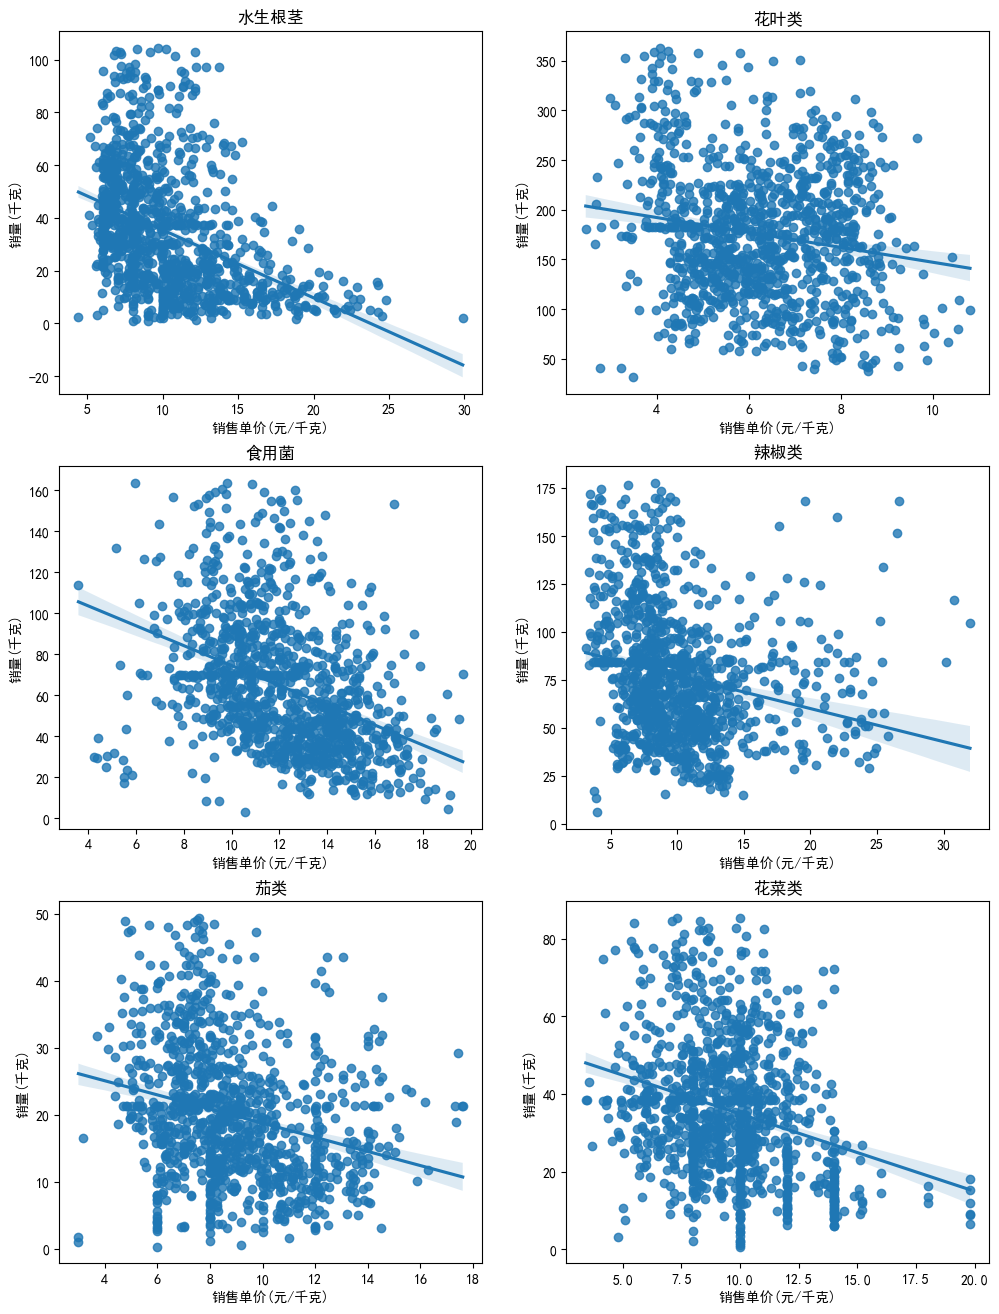

In [289]:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
sns.regplot(data = sell_0,x='销售单价(元/千克)',y='销量(千克)',  ax=axes[0,0],order=1)
sns.regplot(data = sell_1,x='销售单价(元/千克)',y='销量(千克)',ax=axes[0,1],order=1)
sns.regplot(data = sell_2,x='销售单价(元/千克)',y='销量(千克)',ax=axes[1,0],order=1)
sns.regplot(data = sell_3,x='销售单价(元/千克)',y='销量(千克)',ax= axes[1,1],order=1)
sns.regplot(data = sell_4,x='销售单价(元/千克)',y='销量(千克)',ax= axes[2,0],order=1)
sns.regplot(data = sell_5,x='销售单价(元/千克)',y='销量(千克)',ax= axes[2,1],order=1)
axes[0,0].set_title('水生根茎')
axes[0,1].set_title('花叶类')
axes[1,0].set_title('食用菌')
axes[1,1].set_title('辣椒类')
axes[2,0].set_title('茄类')
axes[2,1].set_title('花菜类')

该部分进行数据异常值处理

Text(0.5, 1.0, '花菜类')

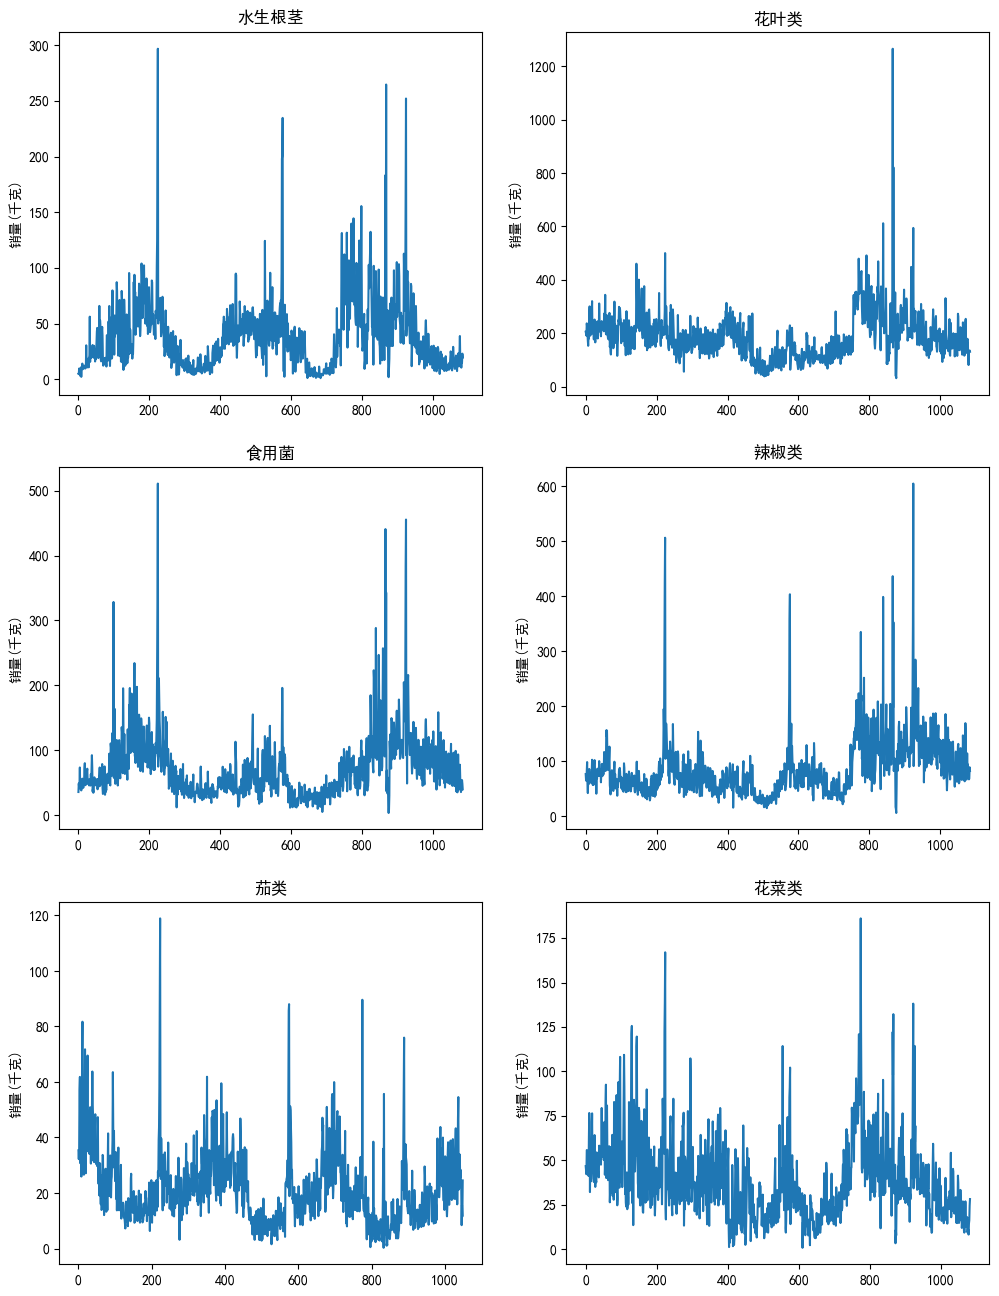

In [281]:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))  #发现异常值
sns.lineplot( sell_0['销量(千克)'],  ax=axes[0,0])
sns.lineplot( sell_1['销量(千克)'],ax=axes[0,1])
sns.lineplot( sell_2['销量(千克)'],ax=axes[1,0])
sns.lineplot( sell_3['销量(千克)'],ax= axes[1,1])
sns.lineplot( sell_4['销量(千克)'],ax= axes[2,0])
sns.lineplot( sell_5['销量(千克)'],ax= axes[2,1])
axes[0,0].set_title('水生根茎')
axes[0,1].set_title('花叶类')
axes[1,0].set_title('食用菌')
axes[1,1].set_title('辣椒类')
axes[2,0].set_title('茄类')
axes[2,1].set_title('花菜类')

In [282]:
def data_exam(data):  #清理异常值，用均值代替
    Q1 = data['销量(千克)'].describe()['25%']
    Q3 = data['销量(千克)'].describe()['75%']
    replace = data['销量(千克)'].mean()
    low_whisker = Q1 - 1.5*(Q3 - Q1)
    up_whisker = Q3 + 1.5*(Q3 - Q1)
    for i in range(len(data)):
        if data.loc[i,'销量(千克)'] < low_whisker:
                data.loc[i,'销量(千克)'] = replace
        elif data.loc[i,'销量(千克)'] > up_whisker:
                data.loc[i,'销量(千克)'] = replace
    print(Q1,Q3)
    
    

In [283]:
data_exam(sell_0)
data_exam(sell_1)
data_exam(sell_2)
data_exam(sell_3)
data_exam(sell_4)
data_exam(sell_5)

15.053 50.818
128.701 223.512
39.259 89.191
51.243 102.131
12.22975 27.12775
23.3065 48.55075


Text(0.5, 1.0, '花菜类')

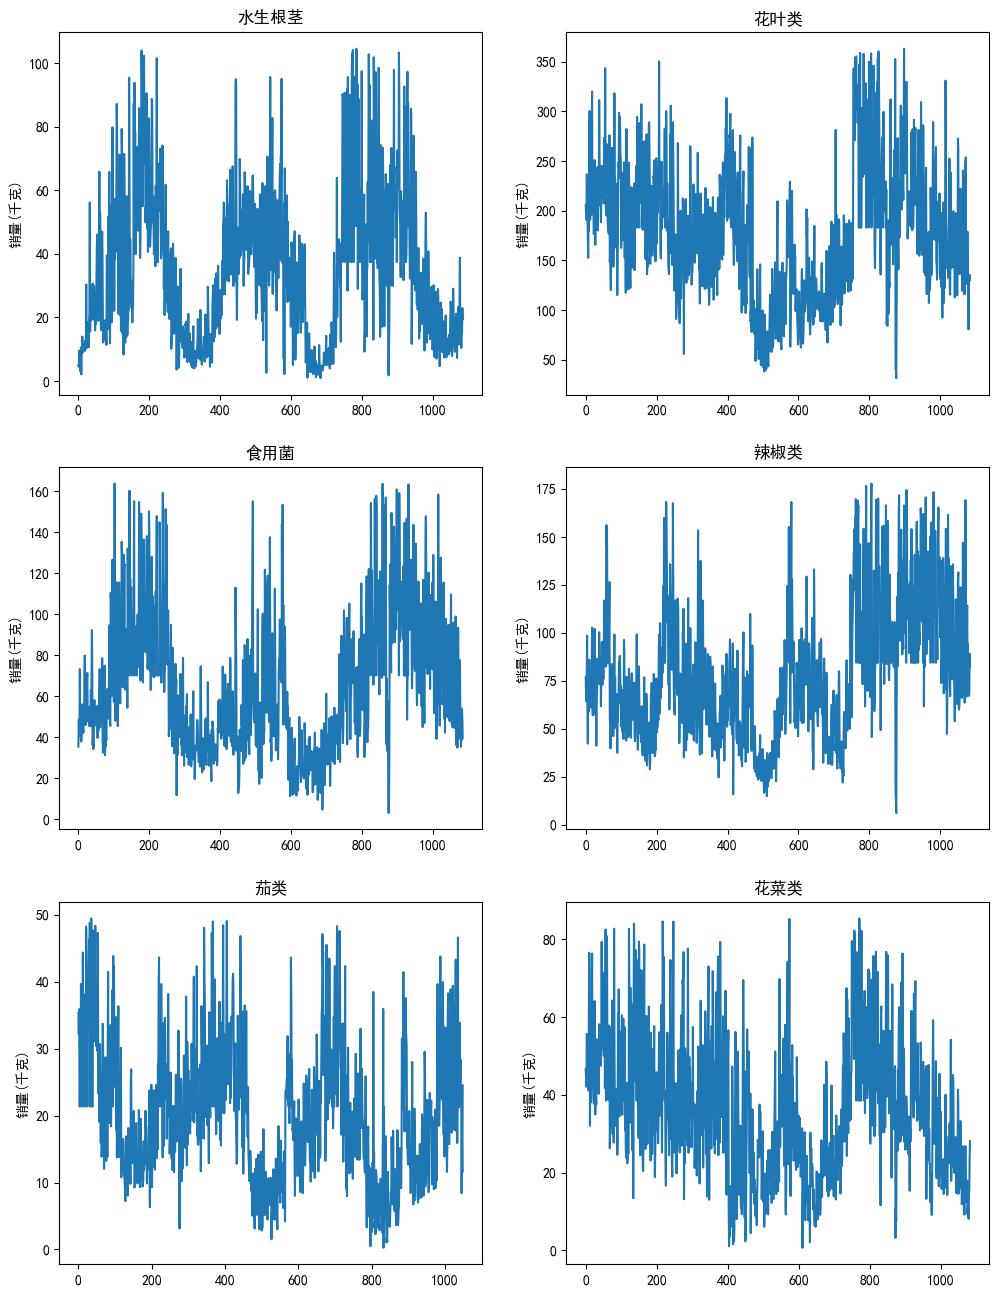

In [421]:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
sns.lineplot( sell_0['销量(千克)'],  ax=axes[0,0])
sns.lineplot( sell_1['销量(千克)'],ax=axes[0,1])
sns.lineplot( sell_2['销量(千克)'],ax=axes[1,0])
sns.lineplot( sell_3['销量(千克)'],ax= axes[1,1])
sns.lineplot( sell_4['销量(千克)'],ax= axes[2,0])
sns.lineplot( sell_5['销量(千克)'],ax= axes[2,1])
axes[0,0].set_title('水生根茎')
axes[0,1].set_title('花叶类')
axes[1,0].set_title('食用菌')
axes[1,1].set_title('辣椒类')
axes[2,0].set_title('茄类')
axes[2,1].set_title('花菜类')

In [432]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
pi = np.pi

def sin_fit(data,axes,pos_x,pos_y):
    x = data.index
    kind = data.loc[1,'分类名称']
    y =  data['销量(千克)']
    sns.lineplot(x=x,y=y,ax=axes[pos_x,pos_y])


    def target_func(x, a0, a1, a2, a3):
        return a0 * np.sin(a1 * x + a2) + a3

    # 拟合sin曲线
    fs = np.fft.fftfreq(len(x), x[1] - x[0])  #用快速傅里叶变换得到频率
    Y = abs(np.fft.fft(y))
    freq = abs(fs[np.argmax(Y[1:]) + 1])
    a0 = max(y) - min(y)
    a1 = 2 * pi * freq
    a2 = 0
    a3 = np.mean(y)
    p0 = [a0, a1, a2, a3]
    para, _ = optimize.curve_fit(target_func, x, y, p0=p0)
    print(para)
    y_fit = [target_func(a, *para) for a in x]

    sns.lineplot(x=x,y=y_fit,ax=axes[pos_x,pos_y])

    axes[pos_x,pos_y].set_title(kind)

    return para


[ 2.05017998e+01  1.85221100e-02 -1.54378668e+00  3.54198307e+01]
[-5.04133584e+01  8.70856764e-03 -2.98239737e+00  1.64857758e+02]
[ 2.25200222e+01  1.70550756e-02 -1.21952247e+00  6.36991093e+01]
[-2.49951822e+01  4.97464056e-03 -3.40242454e-01  7.97132918e+01]
[7.89429366e+00 1.87802828e-02 1.13719863e+00 1.95800781e+01]
[1.13791802e+01 9.44060164e-03 7.34971337e-02 3.41093801e+01]


array([1.13791802e+01, 9.44060164e-03, 7.34971337e-02, 3.41093801e+01])

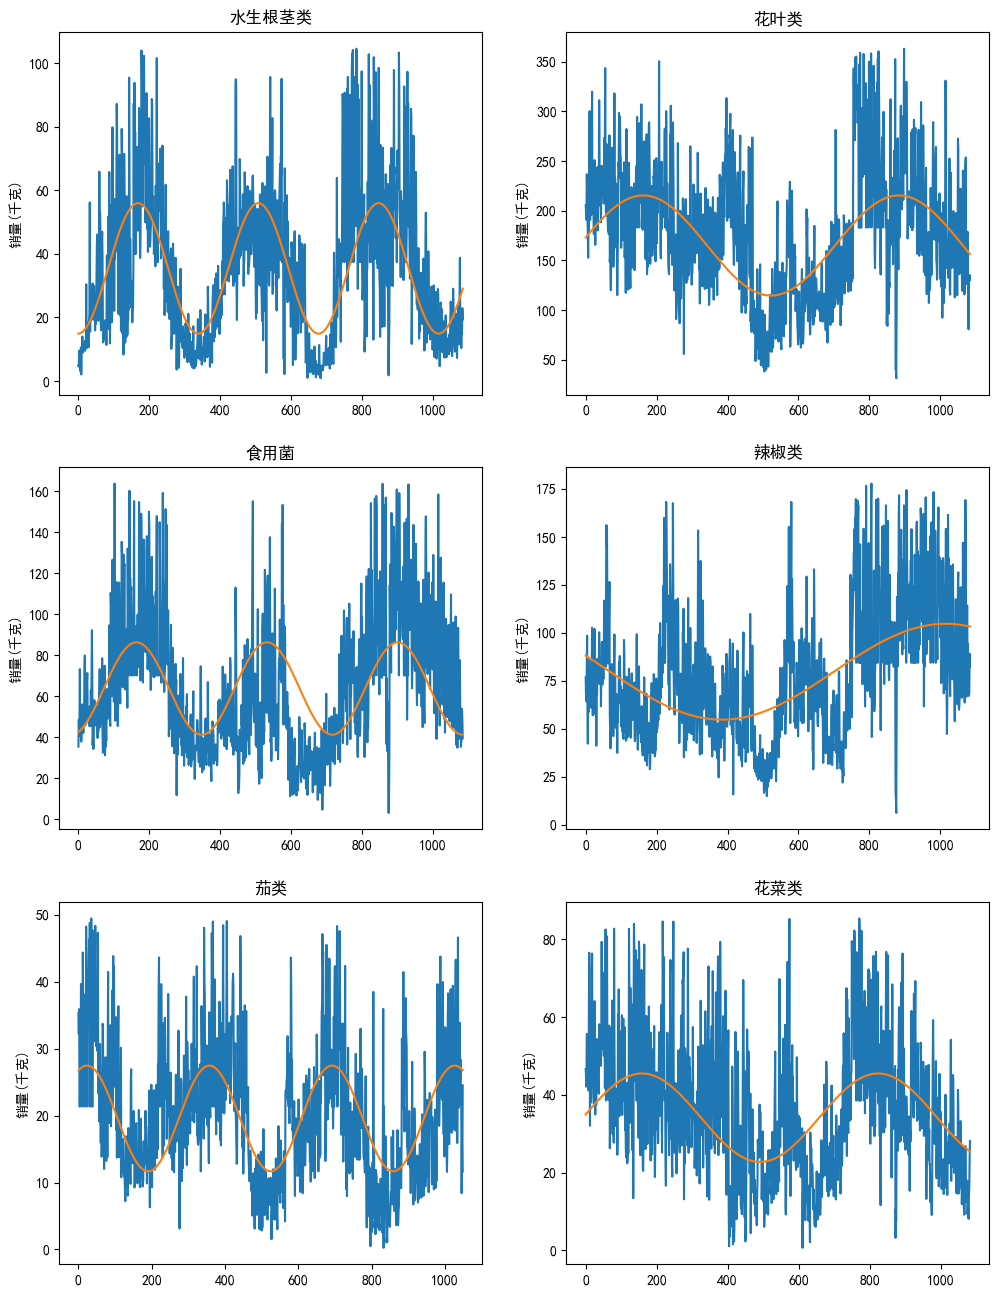

In [433]:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
sin_fit(sell_0,axes,0,0)
sin_fit(sell_1,axes,0,1)
sin_fit(sell_2,axes,1,0)
sin_fit(sell_3,axes,1,1)
sin_fit(sell_4,axes,2,0)
sin_fit(sell_5,axes,2,1)

<Axes: >

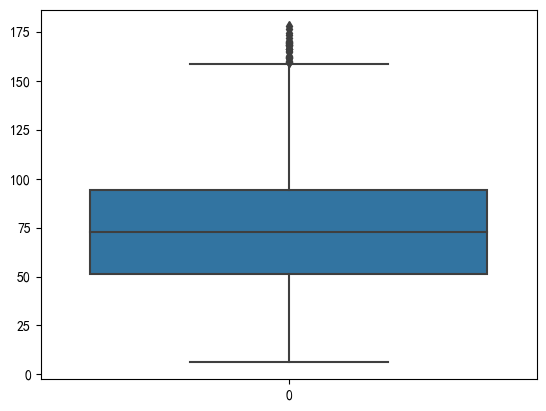

In [285]:
sns.boxplot(sell_3['销量(千克)'])

In [270]:
sell_3['销量(千克)'].describe()
#sell_1.shape

count    1085.000000
mean       84.413483
std        53.436029
min         6.066000
25%        51.243000
50%        72.925000
75%       102.131000
max       604.231000
Name: 销量(千克), dtype: float64

In [132]:
#利用进价，售价，损耗率，季节，进行预测
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,r2_score

def regression(data,draw=False):
    X = data.drop(['日期','分类名称','销量(千克)','品类收益','加成系数'],axis=1)
    Y = data['销量(千克)']
    #train_x,val_x,train_y,val_y = train_test_split(X,Y,random_state=0,train_size=0.95)

    print("\nXGBOOST回归:")
    xgb_model=xgb.XGBRegressor()
    xgb_model.fit(X,Y)
    y_pred = xgb_model.predict(X)
    if draw == True:
        sns.lineplot(Y,label = '实际值')
        sns.lineplot(pd.Series(y_pred,index = Y.index),label='预测值')
        plt.xlabel(data.loc[1,'分类名称'])
        print("测试集r2_score",r2_score(Y,y_pred))
        print("MAE : ",mean_absolute_error(Y, y_pred))
    return xgb_model
    


XGBOOST回归:
测试集r2_score 0.9609804640649336
MAE :  9.592415028751319


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

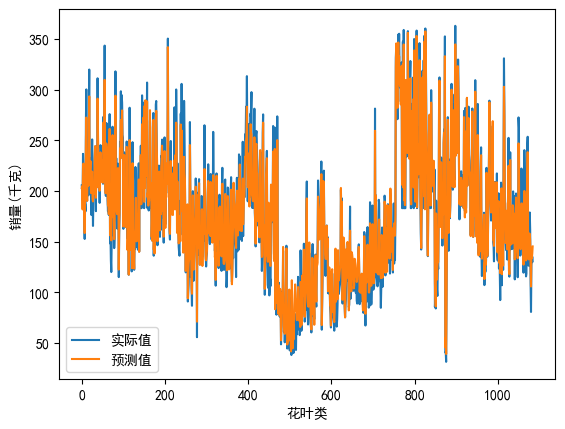

In [287]:
regression(sell_1,True)


In [124]:
def time_series_data(data):  #构建一个数据集，其中有前三天的批发价，当前季度，以及当天的批发价

    origin = data['批发价格(元/千克)']
    push_1 = pd.Series(0).append(origin.drop(len(origin)-1,axis = 0)).reset_index(drop = True)
    push_2 = pd.Series(0).append(push_1.drop(len(push_1)-1,axis = 0)).reset_index(drop = True)
    push_3 = pd.Series(0).append(push_2.drop(len(push_2)-1,axis = 0)).reset_index(drop = True)
    dataset = pd.concat([push_3,push_2,push_1,data['季度'],origin],axis=1).loc[3:].reset_index(drop=True)
    dataset.columns=['day3','day2','day1','季度','day0']
    return dataset

In [125]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差

def score(y_true, y_pre):
    # MSE
    print("MSE :")
    print(metrics.mean_squared_error(y_true, y_pre)) 
    # RMSE
    print("RMSE :")
    print(np.sqrt(metrics.mean_squared_error(y_true, y_pre))) 
    # MAE
    print("MAE :")
    print(metrics.mean_absolute_error(y_true, y_pre)) 
    # R2
    print("R2 :")
    print(r2_score(y_true,y_pre)) 

In [140]:
def predict_time(data,draw=False):  #预测下一天的批发价
    
    time_series = time_series_data(data)
    X_time = time_series[['day3','day2','day1','季度']]
    Y_time = time_series['day0']

    train_X,test_X,train_y,test_y = train_test_split(X_time,Y_time,test_size=0.01,random_state=0)

    print("\nXGBOOST回归预测批发价格:")
    xgb_time=xgb.XGBRegressor()
    xgb_time.fit(train_X.values.tolist(),train_y.values.tolist())
    y_pred = xgb_time.predict(test_X)
    if draw==True:
        y_pred = pd.Series(y_pred,index=test_y.index)
        sns.lineplot(test_y,legend='auto',label = '实际值')
        sns.lineplot(y_pred,legend='auto',label = '预测值')
        plt.xlabel(data.loc[1,'分类名称'])
    return xgb_time


XGBOOST回归预测批发价格:


C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_1 = pd.Series(0).append(origin.drop(len(origin)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_2 = pd.Series(0).append(push_1.drop(len(push_1)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_3 = pd.Series(0).append(push_2.drop(len(push_2)-1,axis = 0)).reset_index(drop = True)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

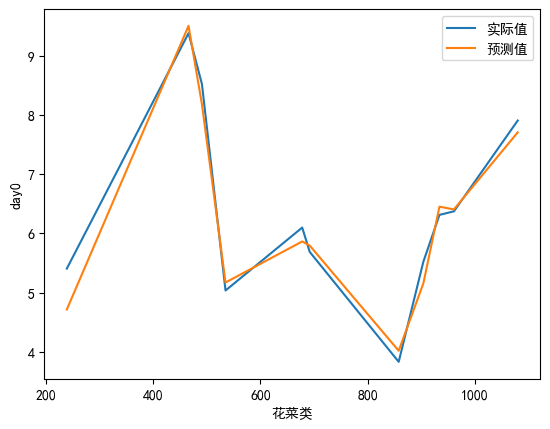

In [290]:
predict_time(sell_5,True)

In [291]:
sell_0

,日期,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),品类收益,季度,加成系数
0,2020-07-01,水生根茎类,4.850,13.973333,8.820667,28.556667,17.853999,3,1.584158
1,2020-07-02,水生根茎类,4.600,11.971429,7.458571,28.878571,14.764199,3,1.605057
2,2020-07-03,水生根茎类,9.572,8.200000,5.610000,29.250000,17.539972,3,1.461676
3,2020-07-04,水生根茎类,5.439,22.075000,14.190625,26.975000,31.315395,3,1.555604
4,2020-07-05,水生根茎类,4.019,10.000000,5.420000,29.250000,13.022967,3,1.845018
...,...,...,...,...,...,...,...,...,...
1080,2023-06-26,水生根茎类,10.384,17.756522,13.013913,15.481739,41.622918,2,1.364426
1081,2023-06-27,水生根茎类,16.454,15.306383,13.388511,17.789787,25.942807,2,1.143248
1082,2023-06-28,水生根茎类,14.946,14.021622,12.529730,16.917027,18.525689,2,1.119068
1083,2023-06-29,水生根茎类,22.945,16.655556,12.370000,15.132222,83.452245,2,1.346447


In [157]:
sell_0.iloc[-3:,]['批发价格(元/千克)']

1082    12.529730
1083    12.370000
1084    12.524314
Name: 批发价格(元/千克), dtype: float64

In [158]:
def predict_next_week(x):  #进行一周7天连续预测

    predictor = predict_time(x)
    origin = x.iloc[-3:,]['批发价格(元/千克)'].tolist()
    for i in range(0,7):
        para = origin[i:i+3]
        para.append(3)
        para = [para]
        result = predictor.predict(para)
        origin.append(result[0])
    return pd.Series(origin[-7:])

In [437]:
#预测结果合并为表
pre_0 = predict_next_week(sell_0)
pre_1 = predict_next_week(sell_1)
pre_2 = predict_next_week(sell_2)
pre_3 = predict_next_week(sell_3)
pre_4 = predict_next_week(sell_4)
pre_5 = predict_next_week(sell_5)

pre_price = pd.concat([pre_0,pre_1,pre_2,pre_3,pre_4,pre_5],axis=1)
pre_price.columns =['水生根茎类','花叶类','食用菌','辣椒类','茄类','花菜类']

C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_1 = pd.Series(0).append(origin.drop(len(origin)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_2 = pd.Series(0).append(push_1.drop(len(push_1)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_3 = pd.Series(0).append(push_2.drop(len(push_2)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:4: FutureWarning: The series.append method is deprecat


XGBOOST回归预测批发价格:

XGBOOST回归预测批发价格:

XGBOOST回归预测批发价格:


C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_1 = pd.Series(0).append(origin.drop(len(origin)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_2 = pd.Series(0).append(push_1.drop(len(push_1)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_3 = pd.Series(0).append(push_2.drop(len(push_2)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2344928296.py:4: FutureWarning: The series.append method is deprecat


XGBOOST回归预测批发价格:

XGBOOST回归预测批发价格:

XGBOOST回归预测批发价格:


In [164]:
pre_price.to_csv('Q2_未来七天各品类批发均价.csv')

In [438]:
pre_price.head()

,水生根茎类,花叶类,食用菌,辣椒类,茄类,花菜类
0,12.406170,2.944583,7.902546,4.842303,4.707205,7.549491
1,11.316101,3.043205,9.294420,4.887139,4.492167,7.232902
2,12.163416,2.975630,8.879456,4.823340,4.627420,7.117421
3,10.403091,2.993083,8.776625,4.766345,4.687941,7.036966
4,9.927949,3.054146,8.820568,4.815512,4.518095,6.850694


In [ ]:
pre_price.mean()

水生根茎类    10.524825
花叶类       2.969313
食用菌       8.887422
辣椒类       4.770348
茄类        4.631523
花菜类       7.067974
dtype: float32

In [172]:
loss = loss.set_index('分类名称')
loss

,分类编码,损耗率
分类名称,,
花菜类,1011010201,15.51
水生根茎类,1011010402,13.65
花叶类,1011010101,12.83
食用菌,1011010801,9.45
辣椒类,1011010504,9.24
茄类,1011010501,6.68


In [439]:
import numpy as np
from deap import base, creator, tools, algorithms
import xgboost as xgb

def GA_for_price(data):  #遗传算法对每一品类、每一天的进货量求最优解
    xgb_model = regression(data)
    kind = data['分类名称'][0]
    print(kind)
    max_val = data['加成系数'].mean()+0.2   #加成系数设置为最大均值+0.2，是反复调试后的结果
    Loss_rate = loss.loc[kind,'损耗率']

    def predict_sales_to_volume(sell_price, trade_price):
        return xgb_model.predict(np.array([sell_price, trade_price,Loss_rate,3]).reshape(1, -1))[0]

    def objective(individual, trade_price):
        sell_price = individual[0]
        sales_to_volume = predict_sales_to_volume(sell_price, trade_price)
        profit = (sales_to_volume * (100 - Loss_rate) / 100) * (sell_price - trade_price)
        return profit #要求利润最大

    def feasible(individual, trade_price):
        return individual[0] > trade_price  #约束条件

    def optimize_price_for_day(trade_price):
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))  #最优化求最大值
        creator.create("Individual", list, fitness=creator.FitnessMax)

        toolbox = base.Toolbox()
        toolbox.register("attr_float", np.random.uniform, trade_price, trade_price*max_val)
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        toolbox.register("mate", tools.cxBlend, alpha=0.5)
        toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
        toolbox.register("select", tools.selTournament, tournsize=3)
        
        toolbox.register("evaluate", objective, trade_price=trade_price)
        toolbox.decorate("evaluate", tools.DeltaPenalty(lambda ind: feasible(ind, trade_price), -np.inf))

        pop = toolbox.population(n=10)
        algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, verbose=False)  #设置遗传迭代100代

        best_individual = tools.selBest(pop, k=1)[0]
        return best_individual[0]

    trade_prices = pre_price[kind].tolist()


    optimal_prices = []
    sales_volumes = []
    profits = []
    for trade_price in trade_prices:
        optimal_sell_price = optimize_price_for_day(trade_price)
        optimal_sales_volume = predict_sales_to_volume(optimal_sell_price, trade_price)
            # Calculate profit for this day
        day_profit = (optimal_sales_volume * (100 - Loss_rate) / 100) * (optimal_sell_price - trade_price)
        profits.append(day_profit)
        optimal_prices.append(optimal_sell_price)
        sales_volumes.append(optimal_sales_volume)
    print(kind,'遗传算法得到最优价：')
    print("最佳售价:", optimal_prices)
    print("预测销量:", sales_volumes)
    print("预测每日收益:", profits)
    print("七天总收益:", sum(profits))
    return optimal_prices,sales_volumes

In [369]:
price_0,volume_0 = GA_for_price(sell_0)
price_1,volume_1 = GA_for_price(sell_1)
price_2,volume_2 = GA_for_price(sell_2)
price_3,volume_3 = GA_for_price(sell_3)
price_4,volume_4 = GA_for_price(sell_4)
price_5,volume_5 = GA_for_price(sell_5)


XGBOOST回归:
水生根茎类


C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


水生根茎类 遗传算法得到最优价：
最佳售价: [24.2499307097171, 18.567454357228648, 19.083730119181247, 15.278919597635594, 15.255664674268461, 14.977390514465263, 14.614799982255144]
预测销量: [13.665422, 16.257734, 21.05278, 29.595255, 30.269098, 27.14707, 18.28634]
预测每日收益: [139.75747055830607, 101.7985114962876, 125.80491562613159, 124.60423942006014, 139.2524577361751, 137.76025727827928, 98.82134869851053]
七天总收益: 867.7992008137503

XGBOOST回归:
花叶类


C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


花叶类 遗传算法得到最优价：
最佳售价: [12.260671077762481, 7.321965092338353, 11.692446476599164, 8.400587396197984, 10.722198523838307, 15.466088130060362, 12.192028407011339]
预测销量: [140.22993, 172.61815, 128.58855, 175.99901, 121.614845, 147.70613, 107.40043]
预测每日收益: [1138.7839674470915, 643.8302629096612, 977.0734995030876, 829.6103964192332, 812.9030269276044, 1614.2060230932357, 875.0353687235005]
七天总收益: 6891.442545023414

XGBOOST回归:
食用菌


C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


食用菌 遗传算法得到最优价：
最佳售价: [16.114748025390647, 16.402842850519946, 23.763436381235785, 24.567308304559326, 16.41592369884693, 15.664299419128946, 16.361911068546824]
预测销量: [56.0561, 61.054237, 59.493885, 55.946247, 59.383194, 69.77675, 61.876507]
预测每日收益: [416.8414797639025, 392.9863853624875, 801.8255413247899, 799.9454013613079, 408.41352874901344, 416.38059374895215, 386.47740075872093]
七天总收益: 3622.8703310691744

XGBOOST回归:
辣椒类


C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


辣椒类 遗传算法得到最优价：
最佳售价: [8.325447990911549, 8.147959695475269, 8.329311926993505, 9.801255558790537, 9.807198745357926, 9.808732761983322, 13.760788729222945]
预测销量: [100.0696, 87.43938, 100.0696, 83.38012, 82.2161, 86.78843, 66.892784]
预测每日收益: [316.3502936341713, 258.7786345730439, 318.4234956627494, 381.0208640023193, 372.4763661937835, 414.8920967869609, 549.1109069882323]
七天总收益: 2611.0526578412605

XGBOOST回归:
茄类


C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


茄类 遗传算法得到最优价：
最佳售价: [7.7875235676864705, 7.785155559671624, 7.747147076932628, 7.786386148212424, 9.7446171137817, 9.742828444040306, 7.786041017359629]
预测销量: [34.424805, 27.254112, 32.574203, 33.27621, 19.859636, 19.160841, 36.218422]
预测每日收益: [98.9559259863312, 83.75236039955433, 94.83422038315105, 96.21713002225029, 96.8631998911682, 92.35243679803496, 100.59175377172751]
七天总收益: 663.5670272522176

XGBOOST回归:
花菜类


C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\zxy08\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


花菜类 遗传算法得到最优价：
最佳售价: [21.986155585501564, 28.681212827531958, 14.914191879991357, 16.988523103065912, 11.098534612259796, 11.88456310512429, 34.98715789058989]
预测销量: [50.37816, 50.37816, 52.158257, 51.43854, 62.538914, 51.706543, 52.360733]
预测每日收益: [614.4894816399769, 912.9367565377731, 343.5920762242981, 432.498873495136, 224.452210426597, 224.81655281992937, 1240.3578871963152]
七天总收益: 3993.1438383400255


In [370]:
best_price = pd.DataFrame({'水生根茎类':price_0,'花叶类':price_1,'食用菌':price_2,'辣椒类':price_3,'茄类':price_4,'花菜类':price_5})
#best_price.columns =['水生根茎类','花叶类','食用菌','辣椒类','茄类','花菜类']
best_price

,水生根茎类,花叶类,食用菌,辣椒类,茄类,花菜类
0,24.249931,12.260671,16.114748,8.325448,7.787524,21.986156
1,18.567454,7.321965,16.402843,8.147960,7.785156,28.681213
2,19.083730,11.692446,23.763436,8.329312,7.747147,14.914192
3,15.278920,8.400587,24.567308,9.801256,7.786386,16.988523
4,15.255665,10.722199,16.415924,9.807199,9.744617,11.098535
5,14.977391,15.466088,15.664299,9.808733,9.742828,11.884563
6,14.614800,12.192028,16.361911,13.760789,7.786041,34.987158


In [374]:
best_price.to_csv('Q2_未来七天各品类销售定价.csv')

In [371]:
trade_volume = pd.DataFrame({'水生根茎类':volume_0,'花叶类':volume_1,'食用菌':volume_2,'辣椒类':volume_3,'茄类':volume_4,'花菜类':volume_5})
trade_volume

,水生根茎类,花叶类,食用菌,辣椒类,茄类,花菜类
0,13.665422,140.229935,56.056099,100.069603,34.424805,50.378159
1,16.257734,172.618149,61.054237,87.439377,27.254112,50.378159
2,21.052780,128.588547,59.493885,100.069603,32.574203,52.158257
3,29.595255,175.999008,55.946247,83.380119,33.276211,51.438541
4,30.269098,121.614845,59.383194,82.216103,19.859636,62.538914
5,27.147070,147.706131,69.776749,86.788429,19.160841,51.706543
6,18.286341,107.400429,61.876507,66.892784,36.218422,52.360733


In [375]:
trade_volume.to_csv('Q2_未来七天各品类进货量.csv')

In [324]:
best_price.loc[1,'花叶类']

6.542614475466403

In [372]:
total_profit = []
for i in range(7):#7天
    profit = 0
    for j in range(6):
        kind = pre_price.columns[j]
        tmp = (best_price.loc[i,kind]-pre_price.loc[i,kind])*trade_volume.loc[i,kind]*(1-loss.loc[kind,'损耗率']/100)
        profit +=tmp
    total_profit.append(profit)

In [373]:
total_profit

[2725.1786190297794,
 2394.082911278808,
 2661.553748724208,
 2663.8969047203072,
 2054.3607899243416,
 2900.4079605253924,
 3250.394666137007]

Text(0.5, 1.0, '日盈利额')

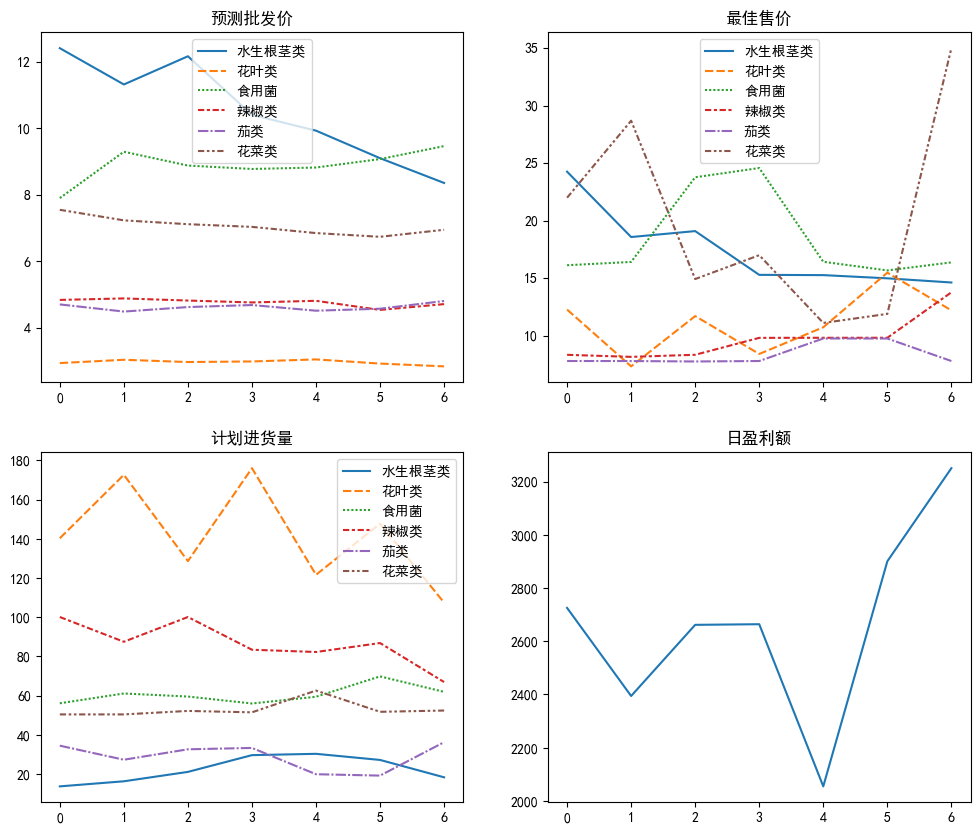

In [376]:
fig,axes = plt.subplots(2,2,figsize = (12,10))
sns.lineplot(pre_price,ax=axes[0,0])
axes[0,0].set_title('预测批发价')
sns.lineplot(best_price,ax=axes[0,1])
axes[0,1].set_title('最佳售价')
sns.lineplot(trade_volume,ax=axes[1,0])
axes[1,0].set_title('计划进货量')
sns.lineplot(total_profit,ax = axes[1,1])
axes[1,1].set_title('日盈利额')

In [378]:
#粒子群算法求解最优解

import numpy as np
import xgboost as xgb
from pyswarm import pso
def PSO_for_price(data):
    xgb_model = regression(data)
    kind = data['分类名称'][0]
    print(kind)
    Loss_rate = loss.loc[kind,'损耗率']
    max_val = data['加成系数'].mean()+0.2  #最大加成系数设置为均值+0.2

    def predict_sales_to_volume(sell_price, trade_price):
        return xgb_model.predict(np.array([sell_price, trade_price,Loss_rate,3]).reshape(1, -1))[0]

    def objective_pso(sell_price, *args):
        trade_price = args[0]
        sales_to_volume = predict_sales_to_volume(sell_price[0], trade_price)
        profit = -(sales_to_volume * (100 - Loss_rate) / 100) * (sell_price - trade_price)  
        return profit

    def constraint(sell_price, *args):
        trade_price = args[0]
        return sell_price - trade_price

    def optimize_price_for_day_pso(trade_price):
        lb = [trade_price]  # 
        ub = [trade_price * max_val]  # 解的搜索空间设置为（批发价，批发价*加成系数）

        # 使用粒子群算法进行优化
        xopt, fopt = pso(objective_pso, lb, ub, f_ieqcons=constraint, args=(trade_price,))
        return xopt[0]

    trade_prices = pre_price[kind].tolist()
    

    optimal_prices_pso = []
    sales_volumes_pso = []

    for trade_price in trade_prices:
        optimal_sell_price_pso = optimize_price_for_day_pso(trade_price)
        optimal_sales_volume_pso = predict_sales_to_volume(optimal_sell_price_pso, trade_price)
        optimal_prices_pso.append(optimal_sell_price_pso)
        sales_volumes_pso.append(optimal_sales_volume_pso)

    print("最佳售价:", optimal_prices_pso)
    print("进货量:", sales_volumes_pso)
    return optimal_prices_pso,sales_volumes_pso

In [379]:
pso_price_0,pso_volume_0 = PSO_for_price(sell_0)
pso_price_1,pso_volume_1 = PSO_for_price(sell_1)
pso_price_2,pso_volume_2 = PSO_for_price(sell_2)
pso_price_3,pso_volume_3 = PSO_for_price(sell_3)
pso_price_4,pso_volume_4 = PSO_for_price(sell_4)
pso_price_5,pso_volume_5 = PSO_for_price(sell_5)


XGBOOST回归:
水生根茎类
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
最佳售价: [18.630647086426848, 18.630648612769065, 18.63064860153206, 15.280427447830512, 15.280427455483938, 15.280427454085538, 12.607903953057205]
进货量: [22.201271, 16.257734, 23.379562, 29.595255, 30.269098, 33.37989, 30.107494]

XGBOOST回归:
花叶类
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search

In [380]:
pso_best_price = pd.DataFrame({'水生根茎类':pso_price_0,'花叶类':pso_price_1,'食用菌':pso_price_2,'辣椒类':pso_price_3,'茄类':pso_price_4,'花菜类':pso_price_5})
#best_price.columns =['水生根茎类','花叶类','食用菌','辣椒类','茄类','花菜类']
pso_best_price

,水生根茎类,花叶类,食用菌,辣椒类,茄类,花菜类
0,18.630647,5.370185,13.942070,8.329332,7.789147,13.103016
1,18.630649,5.629726,16.417451,8.329332,7.789147,11.615174
2,18.630649,5.508845,15.665662,8.329332,7.789147,11.615174
3,15.280427,5.508845,14.814630,8.329332,7.789147,11.615174
4,15.280427,5.629726,15.352647,8.329332,7.789147,11.615174
5,15.280427,5.370185,15.665662,8.148352,7.789147,11.615174
6,12.607904,5.249426,15.665658,8.329332,7.789147,11.615174


In [381]:
pso_best_price.to_csv('Q2_PSO_未来七天各品类销售定价.csv')

In [382]:
pso_trade_volume = pd.DataFrame({'水生根茎类':pso_volume_0,'花叶类':pso_volume_1,'食用菌':pso_volume_2,'辣椒类':pso_volume_3,'茄类':pso_volume_4,'花菜类':pso_volume_5})
pso_trade_volume

,水生根茎类,花叶类,食用菌,辣椒类,茄类,花菜类
0,22.201271,184.268936,55.958500,100.069603,34.424805,48.384056
1,16.257734,172.710266,61.054237,97.103539,27.254112,59.765106
2,23.379562,180.824921,71.016098,100.069603,32.574203,57.203979
3,29.595255,180.824921,61.413933,95.410088,33.276211,56.484264
4,30.269098,172.710266,56.240112,94.246071,29.758978,59.654381
5,33.379890,191.745132,69.776749,79.502563,29.966360,55.584576
6,30.107494,148.249176,71.693199,87.637085,36.218422,61.916435


In [383]:
pso_trade_volume.to_csv('Q2_PSO_未来七天各品类进货量.csv')

In [384]:
pso_total_profit = []
for i in range(7):#7天
    profit = 0
    for j in range(6):
        kind = pre_price.columns[j]
        tmp = (pso_best_price.loc[i,kind]-pre_price.loc[i,kind])*pso_trade_volume.loc[i,kind]*(1-loss.loc[kind,'损耗率']/100)
        profit +=tmp
    pso_total_profit.append(profit)

In [385]:
pso_total_profit

[1457.7084669368053,
 1494.3878156402777,
 1598.1679202379996,
 1480.2906122640202,
 1491.8503215342378,
 1581.6854303081377,
 1455.920151883794]

Text(0.5, 1.0, 'PSO日盈利额')

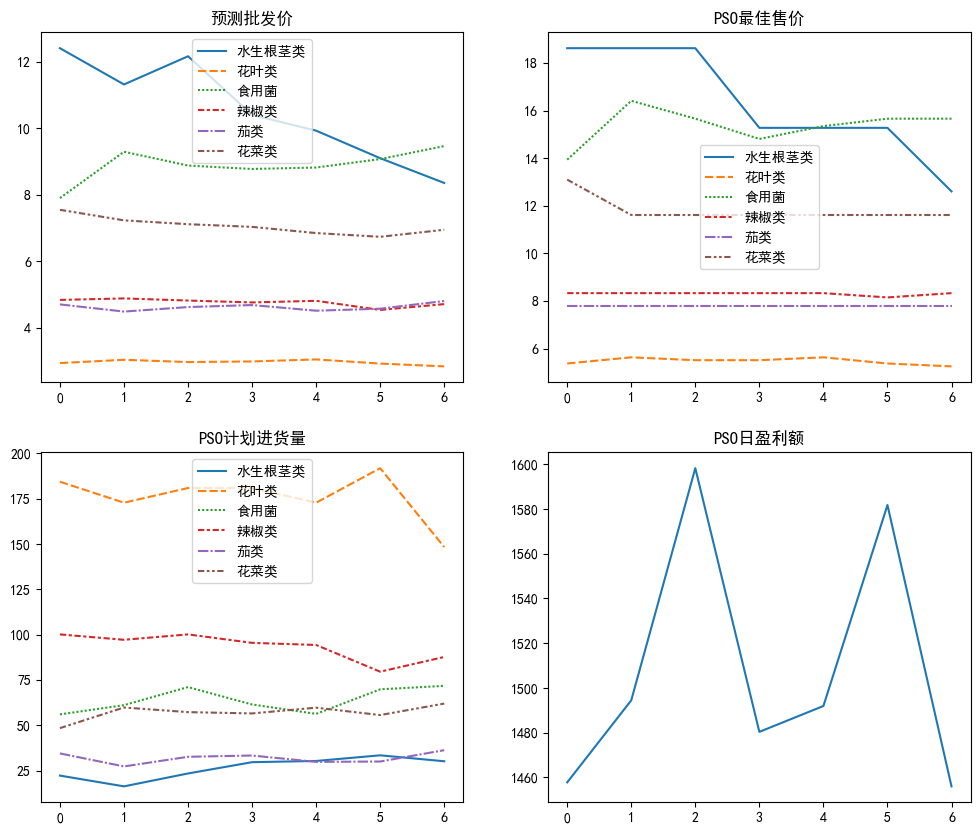

In [386]:
fig,axes = plt.subplots(2,2,figsize = (12,10))
sns.lineplot(pre_price,ax=axes[0,0])
axes[0,0].set_title('预测批发价')
sns.lineplot(pso_best_price,ax=axes[0,1])
axes[0,1].set_title('PSO最佳售价')
sns.lineplot(pso_trade_volume,ax=axes[1,0])
axes[1,0].set_title('PSO计划进货量')
sns.lineplot(pso_total_profit,ax = axes[1,1])
axes[1,1].set_title('PSO日盈利额')

第三问求解代码

In [15]:
sell_product = all_info.groupby(['日期','单品名称','分类名称']).agg({'销量(千克)':'sum','销售单价(元/千克)':'mean','批发价格(元/千克)':'mean','损耗率(%)':'mean'}).reset_index()

In [20]:
sell_recent = sell_product[sell_product['日期']>='2023-6-24'].reset_index(drop=True)
sell_recent

,日期,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
0,2023-06-24,七彩椒(2),辣椒类,0.951,18.220000,11.92,9.43
1,2023-06-24,上海青,花叶类,5.127,8.000000,4.32,14.43
2,2023-06-24,云南油麦菜(份),花叶类,26.000,4.361538,2.94,9.43
3,2023-06-24,云南生菜(份),花叶类,58.000,4.282759,3.32,9.43
4,2023-06-24,净藕(1),水生根茎类,7.656,15.529412,11.00,5.54
...,...,...,...,...,...,...,...
278,2023-06-30,金针菇(盒),食用菌,13.000,1.938462,1.45,0.45
279,2023-06-30,长线茄,茄类,8.789,12.000000,7.00,6.90
280,2023-06-30,青红杭椒组合装(份),辣椒类,4.000,5.800000,3.32,9.43
281,2023-06-30,高瓜(1),水生根茎类,3.780,10.909091,11.67,29.25


In [21]:
sell_recent['利润']=sell_recent['销量(千克)']*(sell_recent['销售单价(元/千克)']-sell_recent['批发价格(元/千克)'])*(1-sell_recent['损耗率(%)']/100)

In [22]:
sell_recent[sell_recent['单品名称']=='小米椒(份)']

,日期,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),利润
12,2023-06-24,小米椒(份),辣椒类,20.0,5.800,2.36,9.43,62.312160
53,2023-06-25,小米椒(份),辣椒类,17.0,5.800,1.94,9.43,59.432034
92,2023-06-26,小米椒(份),辣椒类,20.0,5.685,2.05,9.43,65.844390
134,2023-06-27,小米椒(份),辣椒类,19.0,5.800,2.07,9.43,64.186959
175,2023-06-28,小米椒(份),辣椒类,18.0,5.800,2.17,9.43,59.178438
214,2023-06-29,小米椒(份),辣椒类,33.0,5.800,2.25,9.43,106.102755
254,2023-06-30,小米椒(份),辣椒类,23.0,5.700,2.11,9.43,74.783649


In [18]:
def profit_daily(x):
    return x.sum()/7 #由于一些蔬菜在某天没有销售，所以聚合时不能简单用mean，而是自定义函数

In [23]:
sell_recent_product = sell_recent.drop('日期',axis=1).groupby(['单品名称','分类名称']).agg(profit_daily).sort_values(by='利润',ascending=False).reset_index()
sell_recent_product  #将6.24后可销售蔬菜，按照日均利润排序，优先考虑靠前的单品

,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),利润
0,小米椒(份),辣椒类,21.428571,5.769286,2.135714,9.430000,70.262912
1,西兰花,花菜类,12.557714,12.628571,7.824286,9.260000,52.260101
2,西峡花菇(1),食用菌,4.624143,24.000000,15.600000,10.800000,34.647778
3,云南生菜(份),花叶类,32.285714,4.368424,3.604286,9.430000,25.899138
4,云南油麦菜(份),花叶类,21.285714,4.109125,2.864286,9.430000,24.860171
5,芜湖青椒(1),辣椒类,14.233429,5.200000,3.384286,5.700000,24.607318
6,螺丝椒,辣椒类,6.842429,11.428571,7.515714,10.180000,23.522040
7,紫茄子(2),茄类,10.902857,6.000000,3.747143,6.070000,23.243522
8,净藕(1),水生根茎类,6.026286,14.342785,10.745714,5.540000,20.969485
9,长线茄,茄类,4.214429,12.000000,6.982857,6.900000,19.676388


Text(0.5, 1.0, '品类购买总量')

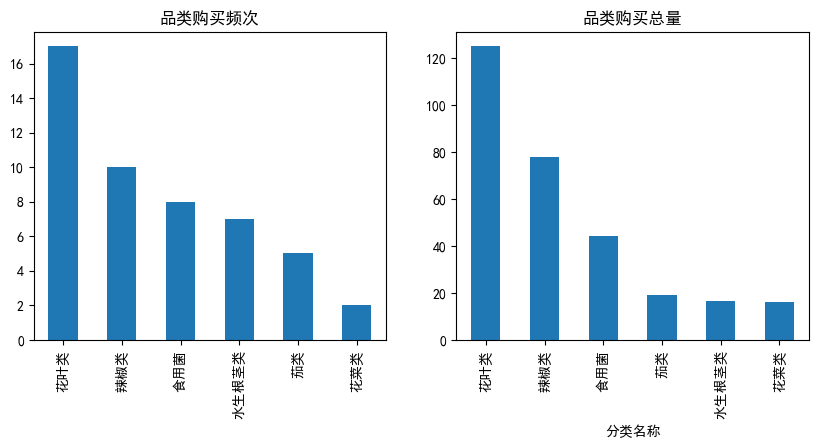

In [29]:
fig,axes = plt.subplots(1,2,figsize = (10,4))  #探究市场对不同品类的需求
plt.xticks(rotation = 45)
sell_recent_product['分类名称'].value_counts().plot(kind='bar',ax=axes[0])
axes[0].set_title('品类购买频次')
sell_recent_product.groupby('分类名称')['销量(千克)'].sum().sort_values(ascending=False).plot(kind='bar',ax=axes[1])
axes[1].set_title('品类购买总量')

In [30]:
open_columns = sell_recent_product['单品名称'][:33].tolist()
open_columns  #候选列表

['小米椒(份)',
 '西兰花',
 '西峡花菇(1)',
 '云南生菜(份)',
 '云南油麦菜(份)',
 '芜湖青椒(1)',
 '螺丝椒',
 '紫茄子(2)',
 '净藕(1)',
 '长线茄',
 '娃娃菜',
 '竹叶菜',
 '螺丝椒(份)',
 '双孢菇(盒)',
 '姜蒜小米椒组合装(小份)',
 '上海青',
 '枝江青梗散花',
 '奶白菜',
 '木耳菜',
 '小皱皮(份)',
 '红椒(2)',
 '苋菜',
 '小青菜(1)',
 '红薯尖',
 '菠菜(份)',
 '洪湖藕带',
 '菱角',
 '海鲜菇(包)',
 '金针菇(盒)',
 '七彩椒(2)',
 '云南生菜',
 '青茄子(1)',
 '青红杭椒组合装(份)']

In [442]:
sell_product.head()

,日期,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
0,2020-07-01,七彩椒(1),辣椒类,1.909,16.0,7.58,15.98
1,2020-07-01,上海青,花叶类,11.476,10.0,7.03,14.43
2,2020-07-01,云南油麦菜,花叶类,32.579,6.0,3.44,12.81
3,2020-07-01,云南生菜,花叶类,41.966,8.0,6.72,15.25
4,2020-07-01,外地茼蒿,花叶类,2.623,16.0,11.69,26.16


In [102]:
#利用进价，售价，损耗率，进行预测，此处和品类预测不同，没有用到季节
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,r2_score

def product_regression(kind,draw = False):
    data = sell_product[sell_product['单品名称']==kind]
    print(len(data))
    X = data[['批发价格(元/千克)','销售单价(元/千克)','损耗率(%)']]
    Y = data['销量(千克)']
    #train_x,val_x,train_y,val_y = train_test_split(X,Y,random_state=0,train_size=0.95)

    print("\nXGBOOST回归:")
    xgb_model=xgb.XGBRegressor()
    xgb_model.fit(X,Y)
    y_pred = xgb_model.predict(X)
    if draw == True:
        sns.lineplot(Y)
        sns.lineplot(pd.Series(y_pred,index = Y.index))
        print("测试集r2_score",r2_score(Y,y_pred))
        print("MAE : ",mean_absolute_error(Y, y_pred))
    return xgb_model

In [35]:
product_regression('西兰花')

1076

XGBOOST回归:
测试集r2_score 0.7437184840697479
MAE :  5.329216107372015


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
def time_series_product(data):  #同样，构建数据集时不需要季节
    origin = data['批发价格(元/千克)']
    push_1 = pd.Series(0).append(origin.drop(len(origin)-1,axis = 0)).reset_index(drop = True)
    push_2 = pd.Series(0).append(push_1.drop(len(push_1)-1,axis = 0)).reset_index(drop = True)
    push_3 = pd.Series(0).append(push_2.drop(len(push_2)-1,axis = 0)).reset_index(drop = True)
    dataset = pd.concat([push_3,push_2,push_1,origin],axis=1).loc[3:].reset_index(drop=True)
    dataset.columns=['day3','day2','day1','day0']
    return dataset

In [37]:
def predict_time_product(data):
    time_series = time_series_product(data)
    X_time = time_series[['day3','day2','day1']]
    Y_time = time_series['day0']

    train_X,test_X,train_y,test_y = train_test_split(X_time,Y_time,test_size=0.05,random_state=0)

    print("\nXGBOOST回归预测批发价格:")
    xgb_time=xgb.XGBRegressor()
    xgb_time.fit(train_X.values.tolist(),train_y.values.tolist())
    y_pred = xgb_time.predict(test_X)
    sns.lineplot(test_y)
    sns.lineplot(pd.Series(y_pred,index = test_y.index))
    return xgb_time

In [426]:
sell_product.tail()

,日期,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
46594,2023-06-30,金针菇(盒),食用菌,13.000,1.938462,1.45,0.45
46595,2023-06-30,长线茄,茄类,8.789,12.000000,7.00,6.90
46596,2023-06-30,青红杭椒组合装(份),辣椒类,4.000,5.800000,3.32,9.43
46597,2023-06-30,高瓜(1),水生根茎类,3.780,10.909091,11.67,29.25
46598,2023-06-30,高瓜(2),水生根茎类,0.512,14.400000,13.69,9.43


In [38]:
def predict_next_day(kind): #仅用预测一天的批发价
    train_data = sell_product[sell_product['单品名称'] == kind].reset_index(drop=True)
    print(train_data)
    predictor = predict_time_product(train_data)
    fit_data = train_data[-3:]['批发价格(元/千克)'].tolist()
    print(fit_data)
    print(predictor.predict([fit_data])[0])
    return predictor.predict([fit_data])[0]
    

In [ ]:
sell_recent_product['预测批发价']= sell_recent_product['单品名称'].apply(predict_next_day)


In [44]:
sell_recent_product.head(10)

,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),利润,预测批发价
0,小米椒(份),辣椒类,21.428571,5.769286,2.135714,9.43,70.262912,2.163908
1,西兰花,花菜类,12.557714,12.628571,7.824286,9.26,52.260101,7.369674
2,西峡花菇(1),食用菌,4.624143,24.000000,15.600000,10.80,34.647778,15.599810
3,云南生菜(份),花叶类,32.285714,4.368424,3.604286,9.43,25.899138,3.445289
4,云南油麦菜(份),花叶类,21.285714,4.109125,2.864286,9.43,24.860171,2.780342
5,芜湖青椒(1),辣椒类,14.233429,5.200000,3.384286,5.70,24.607318,3.340222
6,螺丝椒,辣椒类,6.842429,11.428571,7.515714,10.18,23.522040,8.675126
7,紫茄子(2),茄类,10.902857,6.000000,3.747143,6.07,23.243522,3.257241
8,净藕(1),水生根茎类,6.026286,14.342785,10.745714,5.54,20.969485,10.102935
9,长线茄,茄类,4.214429,12.000000,6.982857,6.90,19.676388,6.853662


In [47]:
product_regression('紫茄子(2)')

1022

XGBOOST回归:
测试集r2_score 0.708850121690718
MAE :  2.793219940325519


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

             日期    单品名称 分类名称  销量(千克)  销售单价(元/千克)  批发价格(元/千克)  损耗率(%)
0    2020-07-01  紫茄子(2)   茄类  17.661       6.000        6.56    6.07
1    2020-07-02  紫茄子(2)   茄类  14.432       7.000        3.72    6.07
2    2020-07-03  紫茄子(2)   茄类  17.553       7.000        6.56    6.07
3    2020-07-04  紫茄子(2)   茄类  33.045       7.000        3.94    6.07
4    2020-07-05  紫茄子(2)   茄类  26.966       6.996        4.24    6.07
...         ...     ...  ...     ...         ...         ...     ...
1017 2023-06-26  紫茄子(2)   茄类  16.395       6.000        3.80    6.07
1018 2023-06-27  紫茄子(2)   茄类   4.095       6.000        3.80    6.07
1019 2023-06-28  紫茄子(2)   茄类   6.075       6.000        3.80    6.07
1020 2023-06-29  紫茄子(2)   茄类   5.369       6.000        3.80    6.07
1021 2023-06-30  紫茄子(2)   茄类  14.365       6.000        3.43    6.07

[1022 rows x 7 columns]

XGBOOST回归预测批发价格:
[3.8, 3.8, 3.43]
3.2572405


C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\3349858087.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_1 = pd.Series(0).append(origin.drop(len(origin)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\3349858087.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_2 = pd.Series(0).append(push_1.drop(len(push_1)-1,axis = 0)).reset_index(drop = True)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\3349858087.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  push_3 = pd.Series(0).append(push_2.drop(len(push_2)-1,axis = 0)).reset_index(drop = True)


3.2572405

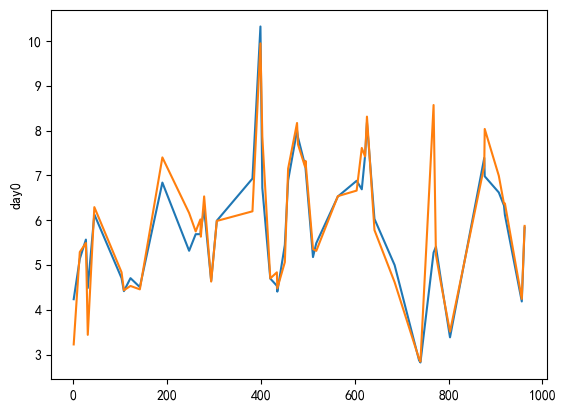

In [48]:
predict_next_day('紫茄子(2)')

In [81]:

sell_recent_product['加成系数'] = sell_recent_product['销售单价(元/千克)']/sell_recent_product['批发价格(元/千克)']
sell_recent_product

,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),利润,预测批发价,加成系数
0,小米椒(份),辣椒类,21.428571,5.769286,2.135714,9.430000,70.262912,2.163908,2.701338
1,西兰花,花菜类,12.557714,12.628571,7.824286,9.260000,52.260101,7.369674,1.614022
2,西峡花菇(1),食用菌,4.624143,24.000000,15.600000,10.800000,34.647778,15.599810,1.538462
3,云南生菜(份),花叶类,32.285714,4.368424,3.604286,9.430000,25.899138,3.445289,1.212008
4,云南油麦菜(份),花叶类,21.285714,4.109125,2.864286,9.430000,24.860171,2.780342,1.434607
5,芜湖青椒(1),辣椒类,14.233429,5.200000,3.384286,5.700000,24.607318,3.340222,1.536513
6,螺丝椒,辣椒类,6.842429,11.428571,7.515714,10.180000,23.522040,8.675126,1.520623
7,紫茄子(2),茄类,10.902857,6.000000,3.747143,6.070000,23.243522,3.257241,1.601220
8,净藕(1),水生根茎类,6.026286,14.342785,10.745714,5.540000,20.969485,10.102935,1.334745
9,长线茄,茄类,4.214429,12.000000,6.982857,6.900000,19.676388,6.853662,1.718494


In [82]:
sell_recent_product['加成系数'].max()

2.701337792642141

In [444]:
import numpy as np
import xgboost as xgb
from pyswarm import pso

def PSO_for_product_price(entry):
    max_val = entry['加成系数']
    kind = entry['单品名称']
    xgb_model = product_regression(kind)
    trade_price = entry['预测批发价']
    print(kind)
    Loss_rate = entry['损耗率(%)']


    def sales_to_volume(x):
        #print(xgb_model.predict(np.array([ trade_price,x[0],Loss_rate]).reshape(1, -1))[0])
        return xgb_model.predict(np.array([ trade_price,x[0],Loss_rate]).reshape(1, -1))[0]

    def objective(x):
        sup = xgb_model.predict(np.array([ trade_price,x[0],Loss_rate]).reshape(1, -1))[0]
        result = -1 * (sup * (100 - Loss_rate) / 100) * (x[0] - trade_price)
        #print(x[0],result)

        return result


    def constraint(x):
        return (x[0]>trade_price) & (sales_to_volume(x)>2.5) #两个约束条件


    # 设定搜索的上下界
    lb = [trade_price + 0.001]  # 确保x > trade_price
    ub = [(max_val+0.5)*trade_price]  # 解的搜索空间，需要根据每种单品的加成系数确定


    xopt, fopt = pso(objective, lb, ub, f_ieqcons=constraint, maxiter=600)  #最大迭代次数600

    print("最优的x（销售单价）为:", xopt[0])
    print("最优的销售数量为:", sales_to_volume(xopt))
    print("最大的商超收益为:", -fopt)
    return xopt[0],sales_to_volume(xopt),-fopt

In [94]:
sell_recent[sell_recent['单品名称'] == '西兰花']

,日期,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),利润
33,2023-06-24,西兰花,花菜类,9.387,14.0,8.42,9.26,47.529122
71,2023-06-25,西兰花,花菜类,10.681,14.0,8.15,9.26,56.697845
110,2023-06-26,西兰花,花菜类,8.083,14.0,7.94,9.26,44.447156
155,2023-06-27,西兰花,花菜类,14.272,12.0,7.80,9.26,54.391734
195,2023-06-28,西兰花,花菜类,13.401,12.0,7.45,9.26,55.328307
235,2023-06-29,西兰花,花菜类,15.180,11.2,7.42,9.26,52.066975
275,2023-06-30,西兰花,花菜类,16.900,11.2,7.59,9.26,55.359567


In [445]:
PSO_for_product_price(sell_recent_product.iloc[1])

1076

XGBOOST回归:
测试集r2_score 0.7437184840697479
MAE :  5.329216107372015
西兰花
Stopping search: Swarm best position change less than 1e-08
最优的x（销售单价）为: 13.838422278840262
最优的销售数量为: 46.10249
最大的商超收益为: 270.60971882395955


(13.838422278840262, 46.10249, 270.60971882395955)

In [103]:
pso_best_product_prise = []
pso_product_trade_volume = []
pso_best_product_income = []
for i in range(33):
    a,b,c = PSO_for_product_price(sell_recent_product.iloc[i])
    pso_best_product_prise.append(a)
    pso_product_trade_volume.append(b)
    pso_best_product_income.append(c)
    


488

XGBOOST回归:
测试集r2_score 0.7578754944624828
MAE :  2.4803639906840247
小米椒(份)
Stopping search: Swarm best position change less than 1e-08
最优的x（销售单价）为: 5.621064707474769
32.72285
最优的销售数量为: 32.72285
最大的商超收益为: 102.46005040720021
32.72285
1076

XGBOOST回归:
测试集r2_score 0.7437184840697479
MAE :  5.329216107372015
西兰花
Stopping search: Swarm best position change less than 1e-08
最优的x（销售单价）为: 13.838422272472172
46.10249
最优的销售数量为: 46.10249
最大的商超收益为: 270.6097185575607
46.10249
297

XGBOOST回归:
测试集r2_score 0.8755164422459225
MAE :  2.3388978017363886
西峡花菇(1)
Stopping search: Swarm best position change less than 1e-08
最优的x（销售单价）为: 21.165907858596775
38.843925
最优的销售数量为: 38.843925
最大的商超收益为: 192.8585208920436
38.843925
400

XGBOOST回归:
测试集r2_score 0.9858579070107628
MAE :  1.74130042552948
云南生菜(份)
Stopping search: Swarm best position change less than 1e-08
最优的x（销售单价）为: 5.72435831005565
43.35062
最优的销售数量为: 43.35062
最大的商超收益为: 89.48231079510917
43.35062
410

XGBOOST回归:
测试集r2_score 0.8751880878814833
MAE :  

In [106]:
sell_recent_product = sell_recent_product[:33]

In [107]:
sell_recent_product['最佳定价'] = pd.Series(pso_best_product_prise)
sell_recent_product['进货量']= pd.Series(pso_product_trade_volume)
sell_recent_product['7月1日收益'] = pd.Series(pso_best_product_income)

C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2167140703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_recent_product['最佳定价'] = pd.Series(pso_best_product_prise)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2167140703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_recent_product['进货量']= pd.Series(pso_product_trade_volume)
C:\Users\zxy08\AppData\Local\Temp\ipykernel_20832\2167140703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [108]:
sell_recent_product

,单品名称,分类名称,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%),利润,预测批发价,加成系数,最佳定价,进货量,7月1日收益
0,小米椒(份),辣椒类,21.428571,5.769286,2.135714,9.430000,70.262912,2.163908,2.701338,5.621065,32.722851,102.460050
1,西兰花,花菜类,12.557714,12.628571,7.824286,9.260000,52.260101,7.369674,1.614022,13.838422,46.102489,270.609719
2,西峡花菇(1),食用菌,4.624143,24.000000,15.600000,10.800000,34.647778,15.599810,1.538462,21.165908,38.843925,192.858521
3,云南生菜(份),花叶类,32.285714,4.368424,3.604286,9.430000,25.899138,3.445289,1.212008,5.724358,43.350620,89.482311
4,云南油麦菜(份),花叶类,21.285714,4.109125,2.864286,9.430000,24.860171,2.780342,1.434607,4.811538,43.026756,79.154386
5,芜湖青椒(1),辣椒类,14.233429,5.200000,3.384286,5.700000,24.607318,3.340222,1.536513,5.800000,34.526226,80.086031
6,螺丝椒,辣椒类,6.842429,11.428571,7.515714,10.180000,23.522040,8.675126,1.520623,17.529163,8.612976,68.496382
7,紫茄子(2),茄类,10.902857,6.000000,3.747143,6.070000,23.243522,3.257241,1.601220,6.105000,27.633907,73.917945
8,净藕(1),水生根茎类,6.026286,14.342785,10.745714,5.540000,20.969485,10.102935,1.334745,14.937500,22.223173,101.487227
9,长线茄,茄类,4.214429,12.000000,6.982857,6.900000,19.676388,6.853662,1.718494,15.204811,9.284203,72.183925


In [117]:
result = sell_recent_product[['单品名称','销量(千克)','预测批发价','最佳定价','进货量','7月1日收益']]

In [118]:
result.columns = ['单品名称','前一周日均销量','预测批发价','最佳定价','进货量','7月1日收益']

In [120]:
result

,单品名称,前一周日均销量,预测批发价,最佳定价,进货量,7月1日收益
0,小米椒(份),21.428571,2.163908,5.621065,32.722851,102.460050
1,西兰花,12.557714,7.369674,13.838422,46.102489,270.609719
2,西峡花菇(1),4.624143,15.599810,21.165908,38.843925,192.858521
3,云南生菜(份),32.285714,3.445289,5.724358,43.350620,89.482311
4,云南油麦菜(份),21.285714,2.780342,4.811538,43.026756,79.154386
5,芜湖青椒(1),14.233429,3.340222,5.800000,34.526226,80.086031
6,螺丝椒,6.842429,8.675126,17.529163,8.612976,68.496382
7,紫茄子(2),10.902857,3.257241,6.105000,27.633907,73.917945
8,净藕(1),6.026286,10.102935,14.937500,22.223173,101.487227
9,长线茄,4.214429,6.853662,15.204811,9.284203,72.183925


In [388]:
result = result.drop([26,29,30,31,32],axis=0).reset_index(drop=True)

In [390]:
result['7月1日收益'].sum()

2076.991471556724

In [389]:
result.to_csv('单品进货计划.csv')